In [5]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [9]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("BIKE DETAILS.csv")

# Display first 10 rows
print("First 10 rows of the dataset:")
display(df.head(10))

# Show the shape of the dataset
print("\nShape of the dataset:", df.shape)

# Show column names
print("\nColumn names:", df.columns.tolist())


First 10 rows of the dataset:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0



Shape of the dataset: (1061, 7)

Column names: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


In [20]:
#Question 2: Check for missing values in all columns and describe your approach for handling them.

'''
 First, I checked for missing values using df.isnull().sum().
 Then I handled them based on column type:

• Numeric columns:
→ Filled missing values with the median, because it is less affected by outliers.

• Categorical columns:
→ Filled missing values with the mode (most frequent category), since it preserves category meaning.

After processing, missing values became 0 in all columns.
'''

import pandas as pd

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [11]:
# Separate numeric & categorical columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill numeric missing values with median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


/tmp/ipython-input-2056354420.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2056354420.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

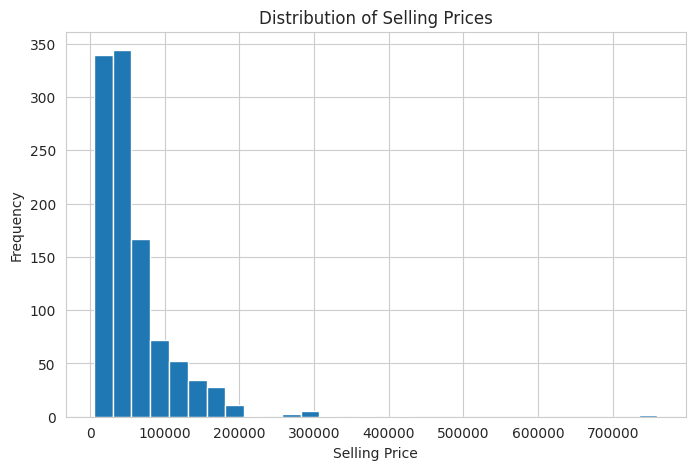

,selling_price
count,1061.000000
mean,59638.151744
std,56304.291973
min,5000.000000
25%,28000.000000
50%,45000.000000
75%,70000.000000
max,760000.000000


In [12]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
'''
The distribution of selling prices is right-skewed, meaning most bikes are sold at lower prices, while a smaller number of bikes are sold at significantly higher prices.
This suggests cheaper bikes are more commonly listed, and luxury/high-priced bikes are fewer.

➡ Most bikes have relatively low selling prices, while only a few models are highly priced.
'''

import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30)
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

# Optional: summary stats
df['selling_price'].describe()



seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


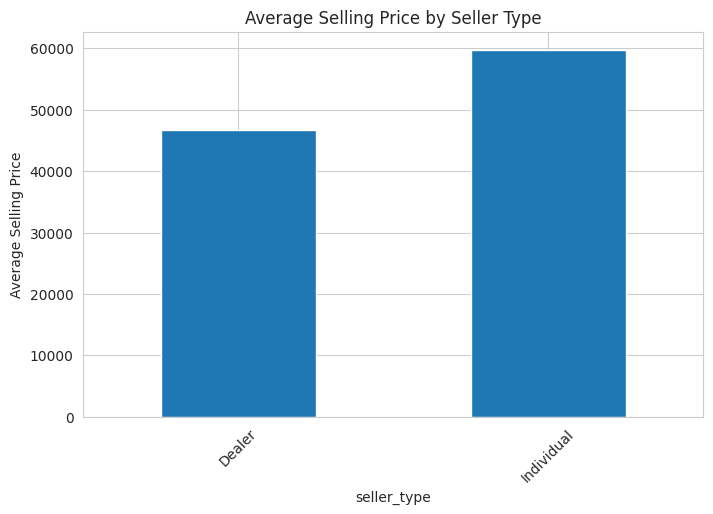

In [13]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_typ and write one observation.
'''
Individual sellers typically offer bikes at lower average prices compared to Dealers.
This suggests that dealer-listed bikes may be better maintained or come with added services, making them slightly costlier.
'''
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Group by seller_type & calculate average selling price
avg_price = df.groupby("seller_type")["selling_price"].mean()

# Display results
print(avg_price)

# Bar plot
plt.figure(figsize=(8,5))
avg_price.plot(kind="bar")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Seller Type")
plt.xticks(rotation=45)
plt.show()


Average km driven per ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


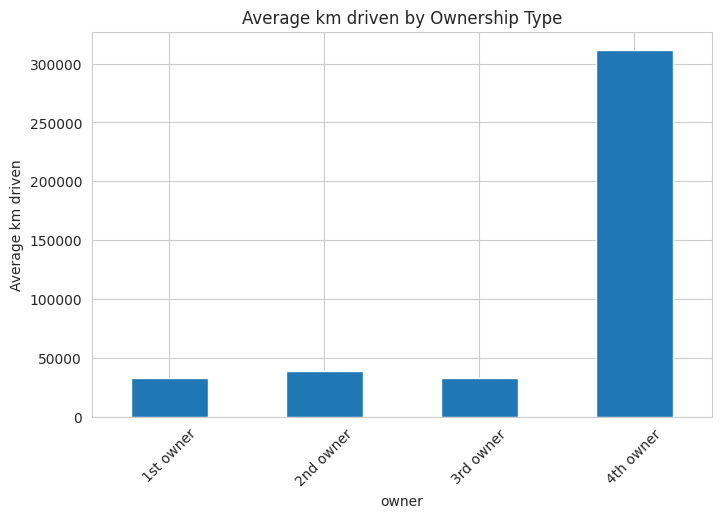

In [14]:
#Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
'''
Higher-order owners (e.g., 2nd owner, 3rd owner) typically have higher average kilometers driven, which makes sense because bikes tend to accumulate more usage as they pass through multiple owners.
'''
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Group by owner & compute average km driven
avg_km = df.groupby("owner")["km_driven"].mean()

# Display values
print("Average km driven per ownership type:")
print(avg_km)

# Bar plot
plt.figure(figsize=(8,5))
avg_km.plot(kind="bar")
plt.ylabel("Average km driven")
plt.title("Average km driven by Ownership Type")
plt.xticks(rotation=45)
plt.show()


In [15]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
'''
Outliers were detected using the IQR Method:

IQR = Q3 − Q1
Lower bound = Q1 – 1.5 × IQR
Upper bound = Q3 + 1.5 × IQR

✔ All values outside this range were removed.

✔ After removing outliers,

The mean & standard deviation of km_driven decreased,

Distribution became more compact & realistic.

This helps improve data quality and reduces skewness from extreme high-mileage bikes.
'''
import pandas as pd

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

# --- BEFORE REMOVAL ---
print("Summary BEFORE removing outliers:\n")
print(df["km_driven"].describe())

# IQR method
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df["km_driven"] >= lower_limit) & (df["km_driven"] <= upper_limit)]

# --- AFTER REMOVAL ---
print("\nSummary AFTER removing outliers:\n")
print(df_no_outliers["km_driven"].describe())

# Show how many rows removed
print("\nRows before:", len(df))
print("Rows after:", len(df_no_outliers))
print("Outliers removed:", len(df) - len(df_no_outliers))


Summary BEFORE removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary AFTER removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Rows before: 1061
Rows after: 1022
Outliers removed: 39


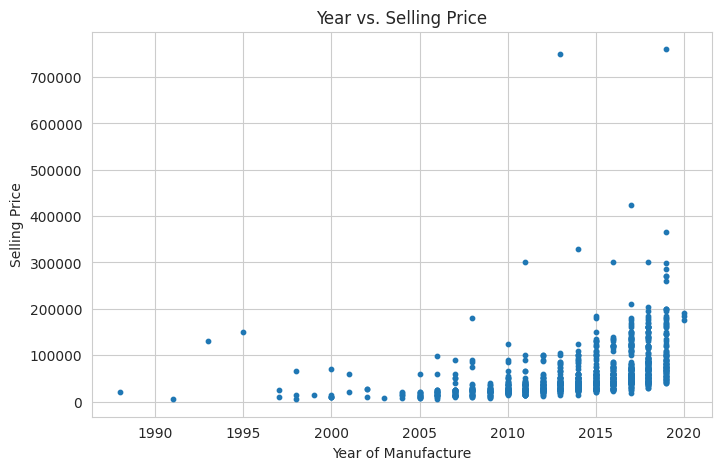

In [16]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
'''
Newer bikes (higher year values) generally have higher selling prices, while older bikes tend to be cheaper.
So there is an inverse relationship between bike age and price — as age increases, price decreases.
'''
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

plt.figure(figsize=(8,5))
plt.scatter(df["year"], df["selling_price"], s=10)
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Year vs. Selling Price")
plt.show()


In [18]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
import pandas as pd

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

# One-hot encode seller_type
df_encoded = pd.get_dummies(df, columns=["seller_type"], prefix="seller")

# Display first 5 rows
print("First 5 rows after one-hot encoding:")
df_encoded.head(5)


First 5 rows after one-hot encoding:


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


Correlation Matrix:

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


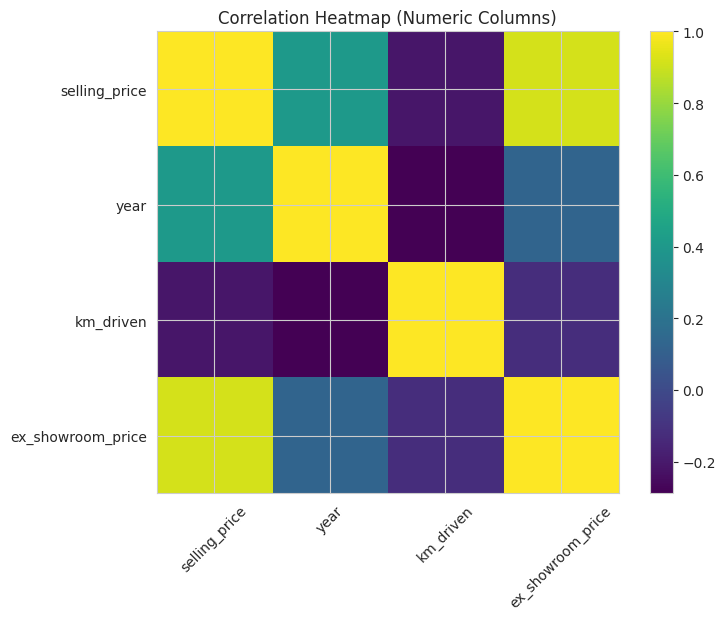

In [19]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
'''
The strongest correlation is between:
✅ selling_price & ex_showroom_price — strong positive (≈ 0.74)

Other notable relationships:
✅ selling_price & year — moderate positive
→ newer bikes tend to cost more

🔻 selling_price & km_driven — weak negative
→ higher mileage slightly lowers value

So, the primary factor influencing selling price is ex_showroom_price, followed by year.
'''
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Select only numeric columns
num_df = df.select_dtypes(include=['int64','float64'])

# Correlation matrix
corr = num_df.corr()
print("Correlation Matrix:\n")
print(corr)

# Heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()



Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.


Answer:
# Summary of Findings

1. Key Factors Affecting a Bike’s Selling Price


---


Based on correlation analysis and exploratory data visualization, the following factors were identified as the most influential in determining a bike’s selling price:

**Ex-showroom price:**
This variable shows the strongest positive correlation with selling price. Bikes with higher original showroom prices tend to retain higher resale values.

**Year of manufacture:**
Newer bikes generally have higher selling prices. As the bike gets older, its selling price decreases, indicating depreciation over time.

**Kilometers driven (km_driven):**
This factor shows a weak negative correlation. As the distance driven increases, the selling price slightly decreases, suggesting that heavily used bikes have marginally lower resale value.

Overall, the most impactful factors affecting resale price are:
Ex-showroom price → Year → Kilometers driven

2. Data Cleaning and Feature Engineering Performed

---



**Missing value handling:**

Numeric columns were imputed with the median value.

Categorical columns were imputed with the mode.

**Outlier treatment:**
The IQR (Interquartile Range) method was applied to the km_driven column to identify and remove extreme mileage values, ensuring a more accurate representation of data.

**Feature engineering:**
The seller_type column was transformed into numerical format using one-hot encoding to facilitate statistical analysis and model readiness.

**Minor preprocessing:**
Column names were standardized for consistency.